### run first cell first, otherwise plt.show() might not work = no images showing


In [1]:
from matplotlib import pyplot as plt
plt.show()

# FIND FACES

proccesing input_images/photo27.jpeg
proccesing input_images/photo31.jpeg
proccesing input_images/photo46.jpeg
was tilted
proccesing input_images/photo11.jpeg
was tilted
proccesing input_images/photo1.jpeg
was tilted
proccesing input_images/photo10.jpeg
was tilted
proccesing input_images/photo26.jpeg
was tilted
proccesing input_images/photo40.jpeg
was tilted
proccesing input_images/photo17.jpeg
proccesing input_images/photo21.jpeg
was tilted
proccesing input_images/photo14.jpg
proccesing input_images/photo37.jpeg
was tilted
proccesing input_images/photo36.jpeg
was tilted
proccesing input_images/photo20.jpeg
 found no faces in this picture\]


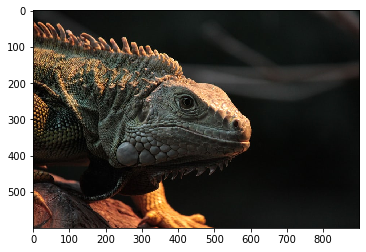

proccesing input_images/photo7.jpeg
was tilted
proccesing input_images/photo16.jpeg
was tilted
proccesing input_images/photo4.jpeg
proccesing input_images/photo15.jpeg
 found no faces in this picture\]


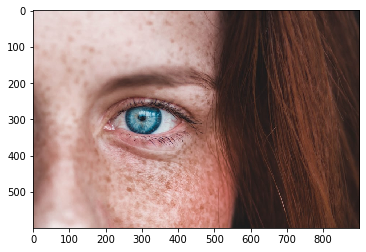

proccesing input_images/photo42.jpeg
was tilted
proccesing input_images/photo39.jpeg
proccesing input_images/photo8.jpeg
was tilted
proccesing input_images/photo19.jpeg
was tilted
proccesing input_images/photo35.jpeg
proccesing input_images/photo23.jpeg
was tilted
proccesing input_images/photo22.jpeg
was tilted
proccesing input_images/photo30.jpg
was tilted
proccesing input_images/photo34.jpeg
 found no faces in this picture\]


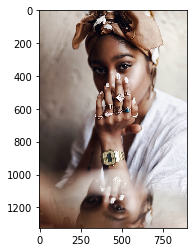

proccesing input_images/photo18.jpeg
was tilted
proccesing input_images/photo9.jpeg
 found no faces in this picture\]


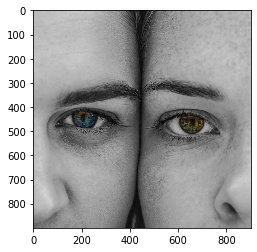

proccesing input_images/photo38.jpeg
was tilted
proccesing input_images/photo43.jpeg
was tilted
proccesing input_images/photo5.jpeg
was tilted
proccesing input_images/photo41.jpg
was tilted
proccesing input_images/photo48.jpeg
was tilted
proccesing input_images/photo33.jpeg
was tilted
proccesing input_images/photo25.jpeg
was tilted
proccesing input_images/photo2.jpeg
 found no faces in this picture\]


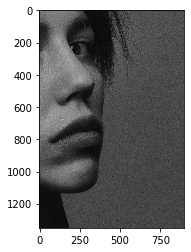

proccesing input_images/photo13.jpeg
proccesing input_images/photo44.jpeg
proccesing input_images/photo6.jpg
was tilted
proccesing input_images/photo29.jpeg
was tilted
proccesing input_images/photo28.jpeg
was tilted
proccesing input_images/photo47.jpg
was tilted
proccesing input_images/photo45.jpeg
was tilted
proccesing input_images/photo12.jpeg
was tilted
proccesing input_images/photo3.jpeg
was tilted
proccesing input_images/photo24.jpeg
proccesing input_images/photo32.jpeg
was tilted


In [2]:
import glob
from PIL import Image
import cv2 
import numpy as np
import types
import os
import m3Face, m3Iris, m3F
from matplotlib import pyplot as plt
inputFolder = "input_images/"
outputFolder = "output_eyes/"
eyesExpected = 37   # Manually type in the number of eyes expected from inputFolder
eyesFound = 0

inputImages=glob.glob(inputFolder + "*.j*")

for imagePath in inputImages:
    
    # if outfolder does not exist, create it
    if not (os.path.exists(outputFolder)):
            os.mkdir(outputFolder)
            print("output folder did not exist,", outputFolder, "created.")
    # read input image
#    imgIn = cv2.imread()
    

    
    # DO STUFF TO ALL IMAGES BELOW
    # *************************

    imgOut = m3Face.findEyes(imagePath)
    # *************************

        #change imagePath from input folder to output folder
    imagePath = imagePath.replace(inputFolder, "")
    inputName = imagePath.replace(".jpeg", "")
    imagePath = outputFolder + inputName
    
    if (type(imgOut) == type(list()) and len(imgOut) > 0):
        eyes = iter(imgOut) # used to iterate through an array. the output of first next() is the first element of array, and so on
        eyeCount = 1
        faceCount = 1
        
        for i in imgOut:
            LR = "Left"
            if ((eyeCount % 2) == 0):
                LR = "Right"
            ouputImg = "{}_Face_{}_{}.jpeg".format(imagePath,str(faceCount),LR)
            cv2.imwrite(ouputImg,next(eyes))
            eyesFound += 1
            
            if ((eyeCount % 2) == 0):
                faceCount += 1
            eyeCount += 1

m3F.printBlue("Found {}% of eyes in the images".format(eyesFound/eyesExpected*100))

# FIND IRIS

In [8]:
from matplotlib import pyplot as plt
plt.show()

In [10]:
import glob
from PIL import Image
import cv2 
import numpy as np
import types
import os
import m3Iris, m3F
inputFolder = "output_eyes/"
outputFolder = "output_irises/"

inputImages=glob.glob(inputFolder + "*.j*")

for imagePath in inputImages:
    
    # if outfolder does not exist, create it
    if not (os.path.exists(outputFolder)):
            os.mkdir(outputFolder)
            print("output folder did not exist,", outputFolder, "created.")
    

    # DO STUFF TO ALL IMAGES BELOW (SENDS IMAGEPATH TO YOUR FUNCTIONS)
    # *************************
    if (m3F.evalSize(imagePath,10,10)):
        imgOut = m3Iris.findCircle(imagePath)
    else:
        print("****************************************************************************************************************")
        m3F.printRed("####IMAGE TOOO SMALL###")
        continue;
        # *************************

     #change imagePath from input folder to output folder
    imagePath = imagePath.replace(inputFolder, "")
    imagePath = outputFolder + imagePath
    
    if (type(imgOut) == type(list())):
        #print("was list")
        # if output 
        eyes = iter(imgOut) # used to iterate thru an array. the output of first next() is the first element of array, and so on
        imagePath = imagePath.replace(".", "_Left.")
        cv2.imwrite(imagePath,next(eyes))
        imagePath = imagePath.replace("_Left.", "_Right.")
        cv2.imwrite(imagePath,next(eyes))
    else:
        if not(type(imgOut) == type(None)):
            cv2.imwrite(imagePath,imgOut)
        #else:   
            #m3F.printRed("IMAGE NULL")


TEST


proccesing input_images/photo24.jpeg
[(263, 534), (278, 510), (306, 498), (337, 508), (315, 524), (287, 535)]
263 534
278 510
306 498
337 508
315 524
287 535


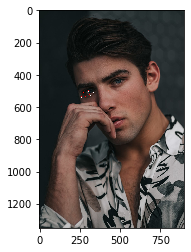

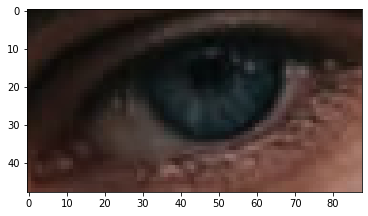

In [61]:
import cv2
from PIL import Image, ImageDraw
import PIL
import face_recognition
import numpy as np
from matplotlib import pyplot as plt
import m3F

inputImPath = "input_images/photo24.jpeg"

print("proccesing", inputImPath),

inputIm = cv2.imread(inputImPath)




face_landmarks_list = face_recognition.face_landmarks(inputIm)
#print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))
#print("face_landmarks_list type was", type(face_landmarks_list))
# Create a PIL imagedraw object so we can draw on the picture
pil_image = Image.open(inputImPath)
    
d = ImageDraw.Draw(pil_image)
   
if (len(face_landmarks_list) == 0):
    m3F.printRed(" found no faces in this picture")
    #plt.imshow(cv2.cvtColor(inputIm,cv2.COLOR_RGB2BGR))
    plt.imshow(inputIm)
    plt.show()
        #plt.imshow(pil_image)
        #plt.show()
for face_landmarks in face_landmarks_list:

    left_eye = face_landmarks['left_eye']
    right_eye = face_landmarks['right_eye']
    
    mg = (left_eye[3][0]-left_eye[0][0])*0.1
    print(left_eye)
    n = 0;
    
    lx,ly,rx,ry = []
    for x,y in left_eye:
        print(x,y)
        lx.append(x)
        ly.append(y)
        d.rectangle([(x-2,y-2),(x+2,y+2)], fill="red")
        d.text((x,y), str(n), fill=(255,255,255,128))
        n = n + 1
        #PIL.circle(np.asarray(pil_image), (x, y), 4, (255, 0, 0), -1)
        
    for x,y in right_eye:
        print(x,y)
        rx.append(x)
        ry.append(y)
        
    lx.sort() # low to high
    ly.sort()
    rx.sort()
    ry.sort()
    LeyeWidth = lx[0] - lx[5]
    LWmargin = LeyeWidth/2
    LeyeHeight = ly[0] - ly[5]
    LHmargin = LeyeHeight/2
    
    
    ReyeWidth = rx[0] - rx[5]
    ReyeHeight = ry[0] - ry[5]
 
    
    d.rectangle([(lx[0]-LWmargin, lx[5] + LWmargin ),()])
    
    pil_image.show()
    plt.imshow(pil_image)
    plt.show()
    
    
    if left_eye[0][1] > left_eye[3][1]:
        # If tilted left - based on how it's seen on image
        #print("found eyes")
        left = [left_eye[0][0]-mg,left_eye[2][1]-mg,left_eye[3][0]+mg,left_eye[5][1]+mg]
        right = [right_eye[0][0]-mg,right_eye[2][1]-mg,right_eye[3][0]+mg,right_eye[5][1]+mg]
        d.rectangle((left))
        d.rectangle((right))
        ntL = np.asarray(pil_image.crop(left))
        ntR = np.asarray(pil_image.crop(right))
        #pil_image.crop(left).show()
        #pil_image.crop(right).show()
        plt.imshow(ntL)
        plt.imshow(ntR)
        plt.show()
    else:
        # If tilted right
        print("was tilted")
        left = [left_eye[0][0]-mg,left_eye[1][1],left_eye[3][0]+mg,left_eye[4][1]]
        right = [right_eye[0][0]-mg,right_eye[1][1],right_eye[3][0]+mg,right_eye[4][1]]
        d.rectangle((left))
        d.rectangle((right))
        tL = np.asarray(pil_image.crop(left))
        tR = np.asarray(pil_image.crop(right))
        plt.imshow(tL)
        plt.imshow(tR)
        plt.show()